Data,N,Y
<chr>,<int>,<int>
Testing,18,19
Training,44,45


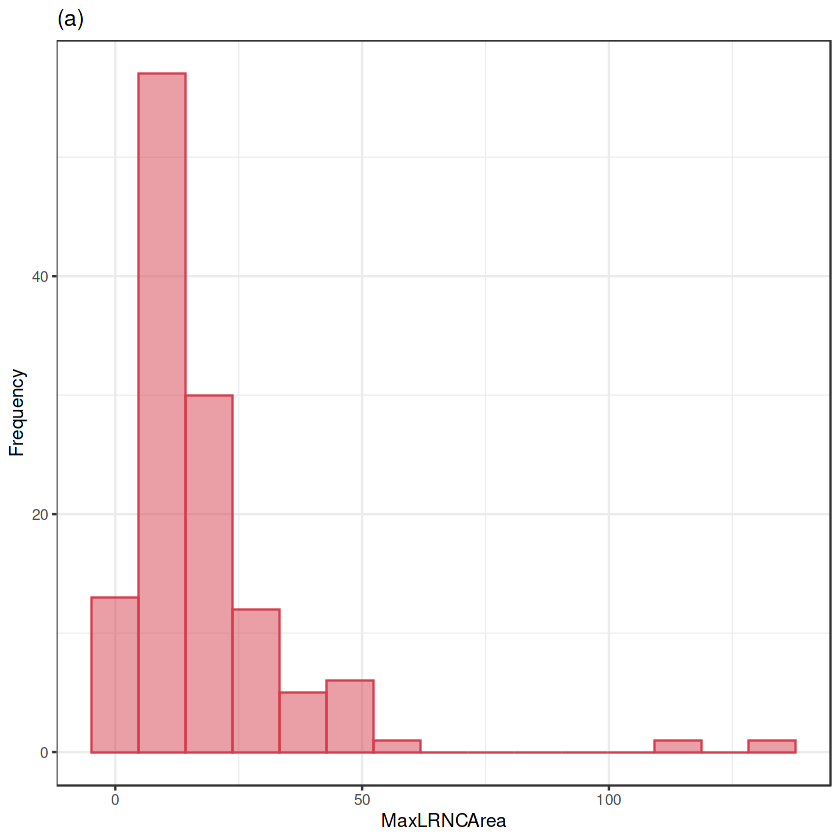

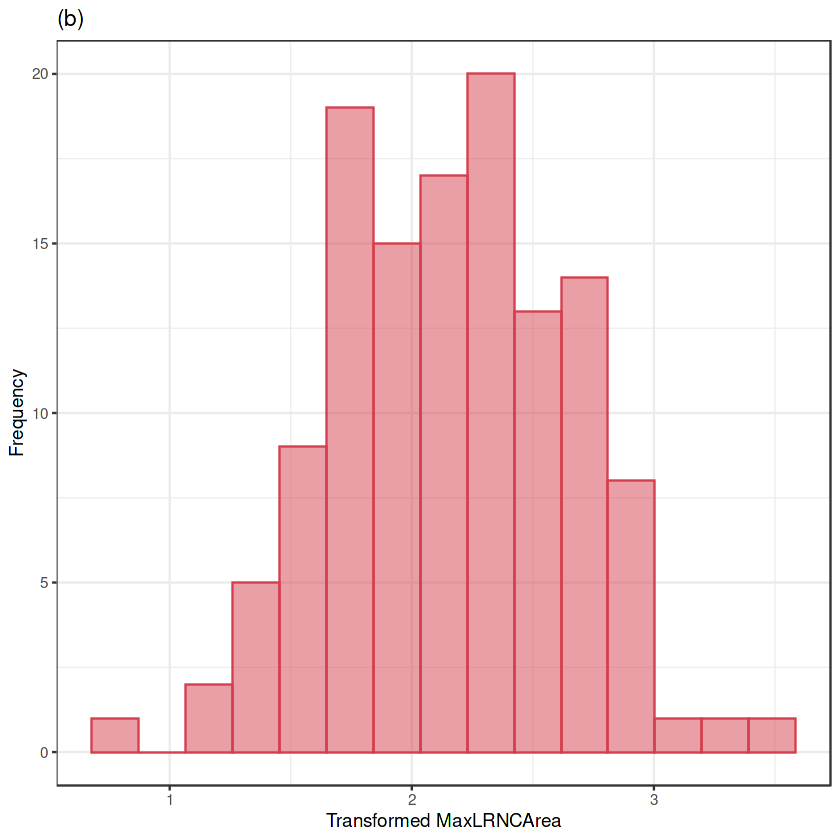

In [4]:
# Packages
packages <- c("corrplot", "tidymodels")

# Install packages not yet installed
installed_packages <- packages %in% rownames(installed.packages())
if (any(installed_packages == FALSE)) {
  install.packages(packages[!installed_packages])
}

# Packages loading
invisible(lapply(packages, library, character.only = TRUE))

theme_set(theme_bw())

# ------------------------------------------------------------------------------

load("stroke_data.RData")

VC_preds <- 
  c("CALCVol", "CALCVolProp", "MATXVol", "MATXVolProp", "LRNCVol", 
    "LRNCVolProp", "MaxCALCArea", "MaxCALCAreaProp", "MaxDilationByArea", 
    "MaxMATXArea", "MaxMATXAreaProp", "MaxLRNCArea", "MaxLRNCAreaProp", 
    "MaxMaxWallThickness", "MaxRemodelingRatio", "MaxStenosisByArea", 
    "MaxWallArea", "WallVol", "MaxStenosisByDiameter")

risk_preds <-
  c("age", "sex", "SmokingHistory", "AtrialFibrillation", "CoronaryArteryDisease", 
    "DiabetesHistory", "HypercholesterolemiaHistory", "HypertensionHistory")

# ------------------------------------------------------------------------------

stroke_train %>% 
  count(Stroke) %>% 
  mutate(Data = "Training") %>% 
  bind_rows(
    stroke_test %>% 
      count(Stroke) %>% 
      mutate(Data = "Testing")
  ) %>% 
  spread(Stroke, n)

# ------------------------------------------------------------------------------

# https://bookdown.org/max/FES/numeric-one-to-one.html#numeric-one-to-one

fig_2_2_a <- 
  bind_rows(stroke_train, stroke_test) %>% 
  ggplot(aes(x = MaxLRNCArea)) +
  geom_histogram(bins = 15, col = "#D53E4F", fill = "#D53E4F", alpha = .5) +
  xlab("MaxLRNCArea") +
  ylab("Frequency") +
  ggtitle("(a)") +
  theme_bw()

fig_2_2_b <- 
  recipe(Stroke ~ ., data = bind_rows(stroke_train, stroke_test)) %>% 
  step_YeoJohnson(all_predictors()) %>% 
  prep() %>% 
  juice() %>% 
  ggplot(aes(x = MaxLRNCArea)) +
  geom_histogram(bins = 15, col = "#D53E4F", fill = "#D53E4F", alpha = .5) +
  xlab("Transformed MaxLRNCArea") +
  ylab("Frequency") +
  ggtitle("(b)") +
  theme_bw()

print(fig_2_2_a)
print(fig_2_2_b)
# ------------------------------------------------------------------------------

risk_train <-
  recipe(Stroke ~ ., data = stroke_train) %>%
  step_center(VC_preds) %>%
  step_scale(VC_preds) %>%
  step_YeoJohnson(VC_preds) %>%
  prep() %>% 
  juice() %>%
  select(-all_of(c("Stroke", "NASCET", risk_preds)))

risk_corr <- cor(risk_train)

# https://bookdown.org/max/FES/stroke-preprocessing.html#fig:stroke-corrMatrix
# corrplot(risk_corr, addgrid.col = rgb(0, 0, 0, .05), order = "hclust")

Loading required package: ggplot2

Loading required package: lattice

── Attaching packages ────────────────────────────────────── tidymodels 1.3.0 ──

✔ broom        1.0.7     ✔ rsample      1.2.1
✔ dials        1.4.0     ✔ tibble       3.2.1
✔ dplyr        1.1.4     ✔ tidyr        1.3.1
✔ infer        1.0.7     ✔ tune         1.3.0
✔ modeldata    1.4.0     ✔ workflows    1.2.0
✔ parsnip      1.3.1     ✔ workflowsets 1.1.0
✔ purrr        1.0.4     ✔ yardstick    1.3.2
✔ recipes      1.2.0     

── Conflicts ───────────────────────────────────────── tidymodels_conflicts() ──
✖ purrr::discard()         masks scales::discard()
✖ dplyr::filter()          masks stats::filter()
✖ dplyr::lag()             masks stats::lag()
✖ purrr::lift()            masks caret::lift()
✖ yardstick::precision()   masks caret::precision()
✖ yardstick::recall()      masks caret::recall()
✖ yardstick::sensitivity() masks caret::sensitivity()
✖ yardstick::specificity() masks caret::specificity()
✖ recipes::step(

Predictor,Improvement,Pvalue,ROC
<chr>,<dbl>,<dbl>,<dbl>
CoronaryArteryDisease,0.079000,0.0002957741,0.579000
DiabetesHistory,0.066500,0.0003019908,0.566500
HypertensionHistory,0.065000,0.0004269919,0.565000
age,0.083375,0.0010729715,0.583375
AtrialFibrillation,0.044000,0.0013131334,0.544000
SmokingHistory,-0.015000,0.7372947489,0.485000
sex,-0.029000,0.8970159364,0.471000
HypercholesterolemiaHistory,-0.100000,0.9999998482,0.400000


Joining with `by = join_by(Predictor)`


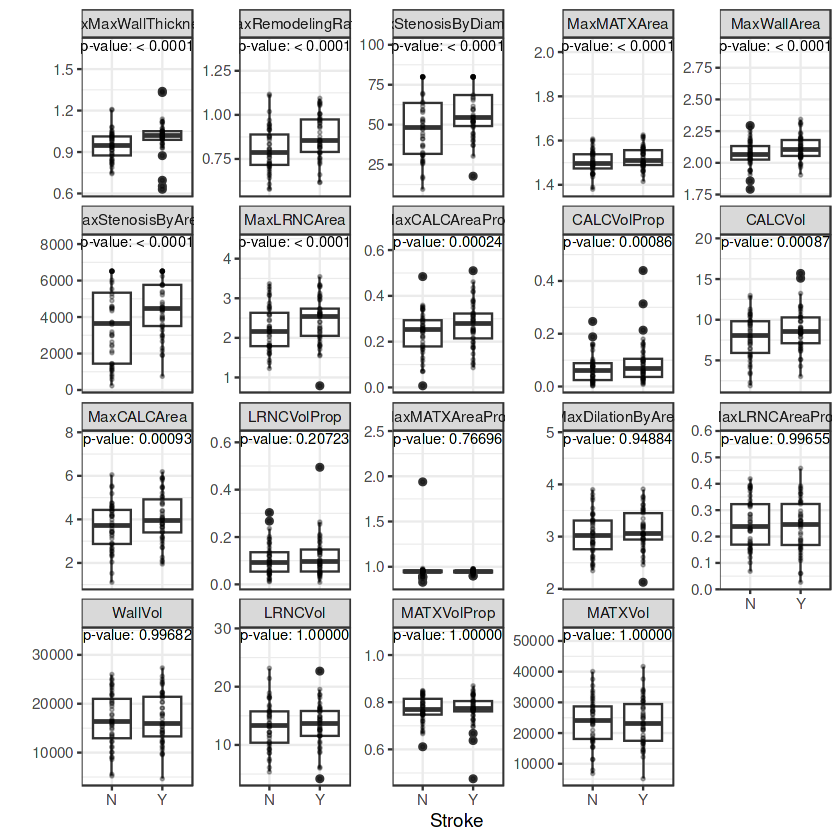

Warning message:
“glm.fit: fitted probabilities numerically 0 or 1 occurred”
Warning message:
“glm.fit: fitted probabilities numerically 0 or 1 occurred”
Warning message:
“glm.fit: fitted probabilities numerically 0 or 1 occurred”
Warning message:
“glm.fit: fitted probabilities numerically 0 or 1 occurred”
Warning message:
“glm.fit: fitted probabilities numerically 0 or 1 occurred”
Warning message:
“glm.fit: fitted probabilities numerically 0 or 1 occurred”
Warning message:
“glm.fit: fitted probabilities numerically 0 or 1 occurred”
Warning message:
“glm.fit: fitted probabilities numerically 0 or 1 occurred”
Warning message:
“glm.fit: fitted probabilities numerically 0 or 1 occurred”
Warning message:
“glm.fit: fitted probabilities numerically 0 or 1 occurred”
Warning message:
“glm.fit: fitted probabilities numerically 0 or 1 occurred”
Warning message:
“glm.fit: fitted probabilities numerically 0 or 1 occurred”
Warning message:
“glm.fit: fitted probabilities numerically 0 or 1 occurred”

Warning message:
“glm.fit: fitted probabilities numerically 0 or 1 occurred”
Warning message:
“glm.fit: fitted probabilities numerically 0 or 1 occurred”
Warning message:
“glm.fit: fitted probabilities numerically 0 or 1 occurred”
Warning message:
“glm.fit: fitted probabilities numerically 0 or 1 occurred”
Warning message:
“glm.fit: fitted probabilities numerically 0 or 1 occurred”
Warning message:
“glm.fit: fitted probabilities numerically 0 or 1 occurred”
Warning message:
“glm.fit: fitted probabilities numerically 0 or 1 occurred”
Warning message:
“glm.fit: fitted probabilities numerically 0 or 1 occurred”
Warning message:
“glm.fit: fitted probabilities numerically 0 or 1 occurred”
Warning message:
“glm.fit: fitted probabilities numerically 0 or 1 occurred”
Warning message:
“glm.fit: fitted probabilities numerically 0 or 1 occurred”
Warning message:
“glm.fit: fitted probabilities numerically 0 or 1 occurred”
Warning message:
“glm.fit: fitted probabilities numerically 0 or 1 occurred”

Warning message:
“glm.fit: fitted probabilities numerically 0 or 1 occurred”
Warning message:
“glm.fit: fitted probabilities numerically 0 or 1 occurred”
Warning message:
“glm.fit: fitted probabilities numerically 0 or 1 occurred”
Warning message:
“glm.fit: fitted probabilities numerically 0 or 1 occurred”
Warning message:
“glm.fit: fitted probabilities numerically 0 or 1 occurred”
Warning message:
“glm.fit: fitted probabilities numerically 0 or 1 occurred”
Warning message:
“glm.fit: fitted probabilities numerically 0 or 1 occurred”
Warning message:
“glm.fit: fitted probabilities numerically 0 or 1 occurred”
Warning message:
“glm.fit: fitted probabilities numerically 0 or 1 occurred”
Warning message:
“glm.fit: fitted probabilities numerically 0 or 1 occurred”
Warning message:
“glm.fit: fitted probabilities numerically 0 or 1 occurred”
Warning message:
“glm.fit: fitted probabilities numerically 0 or 1 occurred”
Warning message:
“glm.fit: fitted probabilities numerically 0 or 1 occurred”

Warning message:
“glm.fit: fitted probabilities numerically 0 or 1 occurred”
Warning message:
“glm.fit: fitted probabilities numerically 0 or 1 occurred”
Warning message:
“glm.fit: fitted probabilities numerically 0 or 1 occurred”
Warning message:
“glm.fit: fitted probabilities numerically 0 or 1 occurred”
Warning message:
“glm.fit: fitted probabilities numerically 0 or 1 occurred”
Warning message:
“glm.fit: fitted probabilities numerically 0 or 1 occurred”
Warning message:
“glm.fit: fitted probabilities numerically 0 or 1 occurred”
Warning message:
“glm.fit: fitted probabilities numerically 0 or 1 occurred”
Warning message:
“glm.fit: fitted probabilities numerically 0 or 1 occurred”
Warning message:
“glm.fit: fitted probabilities numerically 0 or 1 occurred”
Warning message:
“glm.fit: fitted probabilities numerically 0 or 1 occurred”
Warning message:
“glm.fit: fitted probabilities numerically 0 or 1 occurred”
Warning message:
“glm.fit: fitted probabilities numerically 0 or 1 occurred”

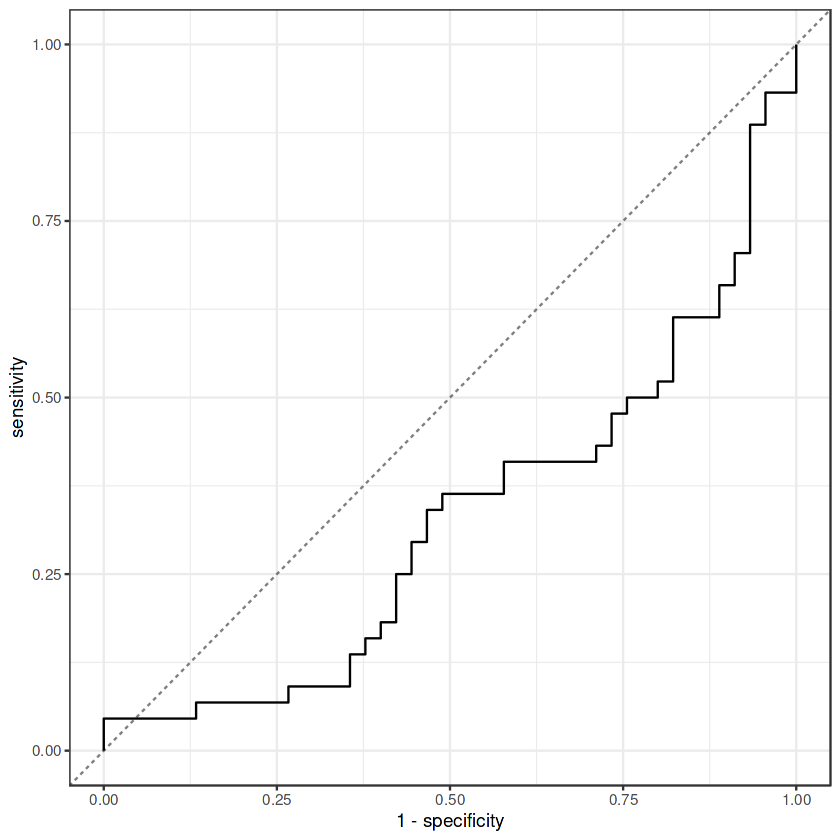

In [1]:
# Packages
packages <- c("caret", "tidymodels", "utils", "pROC", "plotly")

# Install packages not yet installed
installed_packages <- packages %in% rownames(installed.packages())
if (any(installed_packages == FALSE)) {
  install.packages(packages[!installed_packages])
}

# Packages loading
invisible(lapply(packages, library, character.only = TRUE))

theme_set(theme_bw())

# ------------------------------------------------------------------------------

load("stroke_data.RData")

# ------------------------------------------------------------------------------
# Code to compare 2-way interaction models to their main effects model ---------

# `a` and `b` are two models from `train()`
compare_models_1way <- function(a, b, metric = a$metric[1], ...) {
  mods <- list(a, b)
  rs <- resamples(mods)
  diffs <- diff(rs, metric = metric[1], ...)
  diffs$statistics[[1]][[1]]
}

# `risk_preds` is contained in the original data file and has the predictor 
# names for the risk related variables

# ------------------------------------------------------------------------------
# Create a "null model" with no predictors to get baseline performance ---------

null_mat <- data.frame(intercept = rep(1, nrow(stroke_train)))

ctrl <- 
  trainControl(method = "repeatedcv", repeats = 5,
               classProbs = TRUE, 
               summaryFunction = twoClassSummary)

set.seed(63331)
null_mod <- train(x = null_mat, 
                  y = stroke_train$Stroke, 
                  preProc = "YeoJohnson",
                  method = "glm", 
                  metric = "ROC", 
                  trControl = ctrl)

# ------------------------------------------------------------------------------
# Compare the models with single predictors to the risk model. These data make
# https://bookdown.org/max/FES/stroke-tour.html#tab:stroke-strokeRiskAssociations

# `VC_preds` and `risk_preds` contain the predictor names for different sets.

one_predictor_res <- 
  data.frame(Predictor = c(VC_preds, risk_preds), 
             Improvement = NA,
             Pvalue = NA,
             ROC = NA,
             stringsAsFactors = FALSE)


for (i in 1:nrow(one_predictor_res)) {
  set.seed(63331)
  var_mod <- train(Stroke ~ ., 
                   data = stroke_train[, c("Stroke", one_predictor_res$Predictor[i])], 
                   method = "glm", 
                   metric = "ROC",
                   trControl = ctrl)  
  tmp_diff <- compare_models_1way(var_mod, null_mod, alternative = "greater")
  one_predictor_res$ROC[i] <- getTrainPerf(var_mod)[1, "TrainROC"]
  one_predictor_res$Improvement[i] <- tmp_diff$estimate
  one_predictor_res$Pvalue[i] <- tmp_diff$p.value
}

# ------------------------------------------------------------------------------
# Data in table 2.3
# https://bookdown.org/max/FES/stroke-tour.html#tab:stroke-strokeRiskAssociations

one_predictor_res %>% 
  dplyr::filter(Predictor %in% risk_preds) %>% 
  arrange(Pvalue)

# ------------------------------------------------------------------------------
# Figure 2.4
# https://bookdown.org/max/FES/stroke-tour.html#fig:stroke-vascuCAPAssocations

vc_pred <- 
  recipe(Stroke ~ ., data = stroke_train %>% dplyr::select(Stroke, !!!VC_preds)) %>% 
  step_YeoJohnson(all_predictors()) %>% 
  prep(stroke_train %>% dplyr::select(Stroke, !!!VC_preds)) %>% 
  juice() %>% 
  gather(Predictor, value, -Stroke)

# get_max value per predictor

pred_max <- 
  vc_pred %>% 
  group_by(Predictor) %>% 
  summarize(max_val = max(value)) %>% 
  inner_join(one_predictor_res %>% dplyr::select(Pvalue, Predictor)) %>% 
  mutate(
    x = 1.5, 
    value = 1.25 * max_val,
    label = paste0("p-value: ", format.pval(Pvalue, digits = 2, sci = FALSE, eps = .0001))
  )

new_order <- pred_max$Predictor[order(pred_max$Pvalue)]

vc_pred <- 
  vc_pred %>% 
  mutate(Predictor = factor(Predictor, levels = new_order))

pred_max <- 
  pred_max %>% 
  mutate(Predictor = factor(Predictor, levels = new_order))

fig_2_4 <-
  ggplot(vc_pred, aes(x = Stroke, y = value)) + 
  geom_boxplot() + 
  geom_point(alpha = 0.3, cex = .5) + 
  geom_text(data = pred_max, aes(x = x, label = label), size = 3) + 
  facet_wrap(~Predictor, scales = "free_y") + 
  ylab("")

# ------------------------------------------------------------------------------
# Figure 2.5
# https://bookdown.org/max/FES/stroke-tour.html#fig:stroke-maxRemodelingRatioROC

fig_2_5 <- 
  roc_curve(stroke_train, Stroke, MaxRemodelingRatio) %>% 
  ggplot(aes(x = 1 - specificity, y = sensitivity)) + 
  geom_abline(alpha = .5, lty = 2) +
  geom_path()

print(fig_2_4)
print(fig_2_5)

# ------------------------------------------------------------------------------
# Interaction exploration

pairs <- 
  combn(VC_preds, 2) %>% 
  t() %>% 
  as.data.frame(stringsAsFactors = FALSE) %>% 
  mutate(
    Improvement = NA,
    Pvalue = NA,
    ROC = NA
  )

for (i in 1:nrow(pairs)) {
  tmp_vars <- c("Stroke", pairs$V1[i], pairs$V2[i])
  set.seed(63331)
  main_eff <- train(Stroke ~ ., 
                    data = stroke_train[, tmp_vars], 
                    preProc = c("center", "scale", "YeoJohnson"),
                    method = "glm", 
                    metric = "ROC",
                    trControl = ctrl)
  set.seed(63331)
  main_int <- train(Stroke ~ (.)^2, 
                    data = stroke_train[, tmp_vars], 
                    preProc = c("center", "scale", "YeoJohnson"), 
                    method = "glm", 
                    metric = "ROC", 
                    trControl = ctrl)  
  tmp_diff <- compare_models_1way(main_int, main_eff, alternative = "greater")
  pairs$ROC[i] <- getTrainPerf(main_eff)[1, "TrainROC"]
  pairs$Improvement[i] <- tmp_diff$estimate
  pairs$Pvalue[i] <- tmp_diff$p.value
}

retained_pairs <- 
  pairs %>% 
  dplyr::filter(ROC > 0.5  & Pvalue <= 0.2)

# ------------------------------------------------------------------------------
# Figure 2.6
# https://bookdown.org/max/FES/stroke-tour.html#fig:stroke-interactionScreening

vol_plot <- 
  pairs %>% 
  dplyr::filter(ROC > 0.5) %>%
  mutate(Term = paste(V1, "by", V2, "\nROC:", round(ROC, 2))) %>%
  ggplot(aes(x = Improvement, y = -log10(Pvalue))) + 
  xlab("Improvement") +
  geom_point(alpha = .2, aes(size = ROC, text = Term))

vol_plot <- ggplotly(vol_plot, tooltip = "Term")
print(vol_plot)
# vol_plot

# ------------------------------------------------------------------------------

## Create interaction formula
int_form <- 
  pairs %>% 
  dplyr::filter(ROC > 0.5  & Pvalue <= 0.2 & Improvement > 0) %>% 
  mutate(form  = paste0(V1, ":", V2)) %>% 
  pull(form) %>% 
  paste(collapse = "+")
int_form <- paste("~", int_form)
int_form <- as.formula(int_form)

save(int_form, file = "interactions.RData")

Loading required package: ggplot2

Loading required package: lattice

── Attaching packages ────────────────────────────────────── tidymodels 1.3.0 ──

✔ broom        1.0.7     ✔ rsample      1.2.1
✔ dials        1.4.0     ✔ tibble       3.2.1
✔ dplyr        1.1.4     ✔ tidyr        1.3.1
✔ infer        1.0.7     ✔ tune         1.3.0
✔ modeldata    1.4.0     ✔ workflows    1.2.0
✔ parsnip      1.3.1     ✔ workflowsets 1.1.0
✔ purrr        1.0.4     ✔ yardstick    1.3.2
✔ recipes      1.2.0     

── Conflicts ───────────────────────────────────────── tidymodels_conflicts() ──
✖ purrr::discard()         masks scales::discard()
✖ dplyr::filter()          masks stats::filter()
✖ dplyr::lag()             masks stats::lag()
✖ purrr::lift()            masks caret::lift()
✖ yardstick::precision()   masks caret::precision()
✖ yardstick::recall()      masks caret::recall()
✖ yardstick::sensitivity() masks caret::sensitivity()
✖ yardstick::specificity() masks caret::specificity()
✖ recipes::step(

Warning message:
“glm.fit: fitted probabilities numerically 0 or 1 occurred”
Warning message:
“glm.fit: fitted probabilities numerically 0 or 1 occurred”
Warning message:
“glm.fit: fitted probabilities numerically 0 or 1 occurred”
Warning message:
“glm.fit: fitted probabilities numerically 0 or 1 occurred”
Warning message:
“glm.fit: fitted probabilities numerically 0 or 1 occurred”
Warning message:
“glm.fit: fitted probabilities numerically 0 or 1 occurred”
Warning message:
“glm.fit: fitted probabilities numerically 0 or 1 occurred”
Warning message:
“glm.fit: fitted probabilities numerically 0 or 1 occurred”
Warning message:
“glm.fit: fitted probabilities numerically 0 or 1 occurred”
Warning message:
“glm.fit: fitted probabilities numerically 0 or 1 occurred”
Warning message:
“glm.fit: fitted probabilities numerically 0 or 1 occurred”
Warning message in stats::cor(x, use = use, method = method):
“the standard deviation is zero”
Warning message:
“The correlation matrix has missing value

Warning message:
“There were missing importance values. There may be linear dependencies in your predictor variables”
Warning message:
“There were missing importance values. There may be linear dependencies in your predictor variables”
Warning message:
“There were missing importance values. There may be linear dependencies in your predictor variables”
Warning message:
“glm.fit: fitted probabilities numerically 0 or 1 occurred”
Warning message:
“There were missing importance values. There may be linear dependencies in your predictor variables”
Warning message:
“glm.fit: fitted probabilities numerically 0 or 1 occurred”
Warning message:
“There were missing importance values. There may be linear dependencies in your predictor variables”
Warning message:
“There were missing importance values. There may be linear dependencies in your predictor variables”
Warning message:
“There were missing importance values. There may be linear dependencies in your predictor variables”
Warning message:
“Th

Warning message:
“There were missing importance values. There may be linear dependencies in your predictor variables”
Warning message:
“There were missing importance values. There may be linear dependencies in your predictor variables”
Warning message:
“There were missing importance values. There may be linear dependencies in your predictor variables”
Warning message:
“There were missing importance values. There may be linear dependencies in your predictor variables”
Warning message:
“There were missing importance values. There may be linear dependencies in your predictor variables”
Warning message:
“There were missing importance values. There may be linear dependencies in your predictor variables”
Warning message:
“There were missing importance values. There may be linear dependencies in your predictor variables”
Warning message:
“There were missing importance values. There may be linear dependencies in your predictor variables”
Warning message:
“There were missing importance values. 

Warning message:
“There were missing importance values. There may be linear dependencies in your predictor variables”
Warning message:
“glm.fit: fitted probabilities numerically 0 or 1 occurred”
Warning message:
“There were missing importance values. There may be linear dependencies in your predictor variables”
Warning message:
“glm.fit: fitted probabilities numerically 0 or 1 occurred”
Warning message:
“There were missing importance values. There may be linear dependencies in your predictor variables”
Warning message:
“glm.fit: fitted probabilities numerically 0 or 1 occurred”
Warning message:
“There were missing importance values. There may be linear dependencies in your predictor variables”
Warning message:
“glm.fit: fitted probabilities numerically 0 or 1 occurred”
Warning message:
“There were missing importance values. There may be linear dependencies in your predictor variables”
Warning message:
“glm.fit: fitted probabilities numerically 0 or 1 occurred”
Warning message:
“There w

Warning message:
“There were missing importance values. There may be linear dependencies in your predictor variables”
Warning message:
“There were missing importance values. There may be linear dependencies in your predictor variables”
Warning message:
“There were missing importance values. There may be linear dependencies in your predictor variables”
Warning message:
“There were missing importance values. There may be linear dependencies in your predictor variables”
Warning message:
“There were missing importance values. There may be linear dependencies in your predictor variables”
Warning message:
“There were missing importance values. There may be linear dependencies in your predictor variables”
Warning message:
“There were missing importance values. There may be linear dependencies in your predictor variables”
Warning message:
“There were missing importance values. There may be linear dependencies in your predictor variables”
Warning message:
“There were missing importance values. 

Warning message:
“There were missing importance values. There may be linear dependencies in your predictor variables”
Warning message:
“glm.fit: fitted probabilities numerically 0 or 1 occurred”
Warning message:
“There were missing importance values. There may be linear dependencies in your predictor variables”
Warning message:
“glm.fit: fitted probabilities numerically 0 or 1 occurred”
Warning message:
“There were missing importance values. There may be linear dependencies in your predictor variables”
Warning message:
“There were missing importance values. There may be linear dependencies in your predictor variables”
Warning message:
“There were missing importance values. There may be linear dependencies in your predictor variables”
Warning message:
“There were missing importance values. There may be linear dependencies in your predictor variables”
Warning message:
“There were missing importance values. There may be linear dependencies in your predictor variables”
Warning message:
“Th

Warning message:
“There were missing importance values. There may be linear dependencies in your predictor variables”
Warning message:
“There were missing importance values. There may be linear dependencies in your predictor variables”
Warning message:
“There were missing importance values. There may be linear dependencies in your predictor variables”
Warning message:
“There were missing importance values. There may be linear dependencies in your predictor variables”
Warning message:
“There were missing importance values. There may be linear dependencies in your predictor variables”
Warning message:
“There were missing importance values. There may be linear dependencies in your predictor variables”
Warning message:
“There were missing importance values. There may be linear dependencies in your predictor variables”
Warning message:
“There were missing importance values. There may be linear dependencies in your predictor variables”
Warning message:
“There were missing importance values. 

Warning message:
“There were missing importance values. There may be linear dependencies in your predictor variables”
Warning message:
“glm.fit: fitted probabilities numerically 0 or 1 occurred”
Warning message:
“There were missing importance values. There may be linear dependencies in your predictor variables”
Warning message:
“glm.fit: fitted probabilities numerically 0 or 1 occurred”
Warning message:
“There were missing importance values. There may be linear dependencies in your predictor variables”
Warning message:
“glm.fit: fitted probabilities numerically 0 or 1 occurred”
Warning message:
“There were missing importance values. There may be linear dependencies in your predictor variables”
Warning message:
“glm.fit: fitted probabilities numerically 0 or 1 occurred”
Warning message:
“There were missing importance values. There may be linear dependencies in your predictor variables”
Warning message:
“glm.fit: fitted probabilities numerically 0 or 1 occurred”
Warning message:
“There w

Warning message:
“There were missing importance values. There may be linear dependencies in your predictor variables”
Warning message:
“There were missing importance values. There may be linear dependencies in your predictor variables”
Warning message:
“There were missing importance values. There may be linear dependencies in your predictor variables”
Warning message:
“There were missing importance values. There may be linear dependencies in your predictor variables”
Warning message:
“There were missing importance values. There may be linear dependencies in your predictor variables”
Warning message:
“There were missing importance values. There may be linear dependencies in your predictor variables”
Warning message:
“There were missing importance values. There may be linear dependencies in your predictor variables”
Warning message:
“There were missing importance values. There may be linear dependencies in your predictor variables”
Warning message:
“There were missing importance values. 

Warning message:
“glm.fit: fitted probabilities numerically 0 or 1 occurred”
Warning message:
“There were missing importance values. There may be linear dependencies in your predictor variables”
Warning message:
“glm.fit: fitted probabilities numerically 0 or 1 occurred”
Warning message:
“There were missing importance values. There may be linear dependencies in your predictor variables”
Warning message:
“glm.fit: fitted probabilities numerically 0 or 1 occurred”
Warning message:
“There were missing importance values. There may be linear dependencies in your predictor variables”
Warning message:
“There were missing importance values. There may be linear dependencies in your predictor variables”
Warning message:
“There were missing importance values. There may be linear dependencies in your predictor variables”
Warning message:
“There were missing importance values. There may be linear dependencies in your predictor variables”
Warning message:
“There were missing importance values. There

Warning message:
“There were missing importance values. There may be linear dependencies in your predictor variables”
Warning message:
“There were missing importance values. There may be linear dependencies in your predictor variables”
Warning message:
“There were missing importance values. There may be linear dependencies in your predictor variables”
Warning message:
“There were missing importance values. There may be linear dependencies in your predictor variables”
Warning message:
“There were missing importance values. There may be linear dependencies in your predictor variables”
Warning message:
“There were missing importance values. There may be linear dependencies in your predictor variables”
Warning message:
“glm.fit: fitted probabilities numerically 0 or 1 occurred”
Warning message:
“rfe is expecting 36 importance values but only has 35. This may be caused by having zero-variance predictors, excessively-correlated predictors, factor predictors that were expanded into dummy vari

Warning message:
“glm.fit: fitted probabilities numerically 0 or 1 occurred”
Warning message:
“There were missing importance values. There may be linear dependencies in your predictor variables”
Warning message:
“glm.fit: fitted probabilities numerically 0 or 1 occurred”
Warning message:
“There were missing importance values. There may be linear dependencies in your predictor variables”
Warning message:
“glm.fit: fitted probabilities numerically 0 or 1 occurred”
Warning message:
“There were missing importance values. There may be linear dependencies in your predictor variables”
Warning message:
“glm.fit: fitted probabilities numerically 0 or 1 occurred”
Warning message:
“There were missing importance values. There may be linear dependencies in your predictor variables”
Warning message:
“glm.fit: fitted probabilities numerically 0 or 1 occurred”
Warning message:
“There were missing importance values. There may be linear dependencies in your predictor variables”
Warning message:
“glm.fit

Warning message:
“There were missing importance values. There may be linear dependencies in your predictor variables”
Warning message:
“There were missing importance values. There may be linear dependencies in your predictor variables”
Warning message:
“There were missing importance values. There may be linear dependencies in your predictor variables”
Warning message:
“There were missing importance values. There may be linear dependencies in your predictor variables”
Warning message:
“There were missing importance values. There may be linear dependencies in your predictor variables”
Warning message:
“glm.fit: fitted probabilities numerically 0 or 1 occurred”
Warning message in predict.lm(object, newdata, se.fit, scale = 1, type = if (type == :
“prediction from rank-deficient fit; attr(*, "non-estim") has doubtful cases”
Warning message in predict.lm(object, newdata, se.fit, scale = 1, type = if (type == :
“prediction from rank-deficient fit; attr(*, "non-estim") has doubtful cases”
War

Warning message:
“There were missing importance values. There may be linear dependencies in your predictor variables”
Warning message:
“There were missing importance values. There may be linear dependencies in your predictor variables”
Warning message:
“There were missing importance values. There may be linear dependencies in your predictor variables”
Warning message:
“There were missing importance values. There may be linear dependencies in your predictor variables”
Warning message:
“There were missing importance values. There may be linear dependencies in your predictor variables”
Warning message:
“There were missing importance values. There may be linear dependencies in your predictor variables”
Warning message:
“There were missing importance values. There may be linear dependencies in your predictor variables”
Warning message:
“There were missing importance values. There may be linear dependencies in your predictor variables”
Warning message:
“There were missing importance values. 

Warning message:
“glm.fit: fitted probabilities numerically 0 or 1 occurred”
Warning message:
“rfe is expecting 36 importance values but only has 35. This may be caused by having zero-variance predictors, excessively-correlated predictors, factor predictors that were expanded into dummy variables or you may have failed to drop one of your dummy variables.”
Warning message:
“There were missing importance values. There may be linear dependencies in your predictor variables”
Warning message:
“glm.fit: fitted probabilities numerically 0 or 1 occurred”
Warning message:
“There were missing importance values. There may be linear dependencies in your predictor variables”
Warning message:
“glm.fit: fitted probabilities numerically 0 or 1 occurred”
Warning message:
“There were missing importance values. There may be linear dependencies in your predictor variables”
Warning message:
“glm.fit: fitted probabilities numerically 0 or 1 occurred”
Warning message:
“There were missing importance values. 

Warning message:
“There were missing importance values. There may be linear dependencies in your predictor variables”
Warning message:
“There were missing importance values. There may be linear dependencies in your predictor variables”
Warning message:
“There were missing importance values. There may be linear dependencies in your predictor variables”
Warning message:
“There were missing importance values. There may be linear dependencies in your predictor variables”
Warning message:
“There were missing importance values. There may be linear dependencies in your predictor variables”
Warning message:
“There were missing importance values. There may be linear dependencies in your predictor variables”
Warning message:
“There were missing importance values. There may be linear dependencies in your predictor variables”
Warning message:
“There were missing importance values. There may be linear dependencies in your predictor variables”
Warning message:
“There were missing importance values. 

Warning message:
“There were missing importance values. There may be linear dependencies in your predictor variables”
Warning message:
“glm.fit: fitted probabilities numerically 0 or 1 occurred”
Warning message:
“rfe is expecting 36 importance values but only has 35. This may be caused by having zero-variance predictors, excessively-correlated predictors, factor predictors that were expanded into dummy variables or you may have failed to drop one of your dummy variables.”
Warning message:
“There were missing importance values. There may be linear dependencies in your predictor variables”
Warning message:
“glm.fit: fitted probabilities numerically 0 or 1 occurred”
Warning message:
“There were missing importance values. There may be linear dependencies in your predictor variables”
Warning message:
“glm.fit: fitted probabilities numerically 0 or 1 occurred”
Warning message:
“There were missing importance values. There may be linear dependencies in your predictor variables”
Warning message

Warning message:
“There were missing importance values. There may be linear dependencies in your predictor variables”
Warning message:
“There were missing importance values. There may be linear dependencies in your predictor variables”
Warning message:
“There were missing importance values. There may be linear dependencies in your predictor variables”
Warning message:
“There were missing importance values. There may be linear dependencies in your predictor variables”
Warning message:
“There were missing importance values. There may be linear dependencies in your predictor variables”
Warning message:
“There were missing importance values. There may be linear dependencies in your predictor variables”
Warning message:
“There were missing importance values. There may be linear dependencies in your predictor variables”
Warning message:
“There were missing importance values. There may be linear dependencies in your predictor variables”
Warning message:
“There were missing importance values. 

Warning message:
“There were missing importance values. There may be linear dependencies in your predictor variables”
Warning message:
“glm.fit: fitted probabilities numerically 0 or 1 occurred”
Warning message:
“rfe is expecting 36 importance values but only has 35. This may be caused by having zero-variance predictors, excessively-correlated predictors, factor predictors that were expanded into dummy variables or you may have failed to drop one of your dummy variables.”
Warning message:
“There were missing importance values. There may be linear dependencies in your predictor variables”
Warning message:
“glm.fit: fitted probabilities numerically 0 or 1 occurred”
Warning message:
“There were missing importance values. There may be linear dependencies in your predictor variables”
Warning message:
“glm.fit: fitted probabilities numerically 0 or 1 occurred”
Warning message:
“There were missing importance values. There may be linear dependencies in your predictor variables”
Warning message

Warning message:
“There were missing importance values. There may be linear dependencies in your predictor variables”
Warning message:
“There were missing importance values. There may be linear dependencies in your predictor variables”
Warning message:
“There were missing importance values. There may be linear dependencies in your predictor variables”
Warning message:
“There were missing importance values. There may be linear dependencies in your predictor variables”
Warning message:
“There were missing importance values. There may be linear dependencies in your predictor variables”
Warning message:
“There were missing importance values. There may be linear dependencies in your predictor variables”
Warning message:
“There were missing importance values. There may be linear dependencies in your predictor variables”
Warning message:
“There were missing importance values. There may be linear dependencies in your predictor variables”
Warning message:
“There were missing importance values. 

Warning message:
“There were missing importance values. There may be linear dependencies in your predictor variables”
Warning message:
“glm.fit: fitted probabilities numerically 0 or 1 occurred”
Warning message:
“There were missing importance values. There may be linear dependencies in your predictor variables”
Warning message:
“glm.fit: fitted probabilities numerically 0 or 1 occurred”
Warning message:
“There were missing importance values. There may be linear dependencies in your predictor variables”
Warning message:
“glm.fit: fitted probabilities numerically 0 or 1 occurred”
Warning message:
“There were missing importance values. There may be linear dependencies in your predictor variables”
Warning message:
“glm.fit: fitted probabilities numerically 0 or 1 occurred”
Warning message:
“There were missing importance values. There may be linear dependencies in your predictor variables”
Warning message:
“glm.fit: fitted probabilities numerically 0 or 1 occurred”
Warning message:
“There w

Warning message:
“There were missing importance values. There may be linear dependencies in your predictor variables”
Warning message:
“There were missing importance values. There may be linear dependencies in your predictor variables”
Warning message:
“There were missing importance values. There may be linear dependencies in your predictor variables”
Warning message:
“There were missing importance values. There may be linear dependencies in your predictor variables”
Warning message:
“There were missing importance values. There may be linear dependencies in your predictor variables”
Warning message:
“There were missing importance values. There may be linear dependencies in your predictor variables”
Warning message:
“There were missing importance values. There may be linear dependencies in your predictor variables”
Warning message:
“There were missing importance values. There may be linear dependencies in your predictor variables”
Warning message:
“There were missing importance values. 

Warning message:
“glm.fit: fitted probabilities numerically 0 or 1 occurred”
Warning message:
“There were missing importance values. There may be linear dependencies in your predictor variables”
Warning message:
“glm.fit: fitted probabilities numerically 0 or 1 occurred”
Warning message:
“There were missing importance values. There may be linear dependencies in your predictor variables”
Warning message:
“glm.fit: fitted probabilities numerically 0 or 1 occurred”
Warning message:
“There were missing importance values. There may be linear dependencies in your predictor variables”
Warning message:
“glm.fit: fitted probabilities numerically 0 or 1 occurred”
Warning message:
“There were missing importance values. There may be linear dependencies in your predictor variables”
Warning message:
“glm.fit: fitted probabilities numerically 0 or 1 occurred”
Warning message:
“There were missing importance values. There may be linear dependencies in your predictor variables”
Warning message:
“glm.fit

Warning message:
“There were missing importance values. There may be linear dependencies in your predictor variables”
Warning message:
“There were missing importance values. There may be linear dependencies in your predictor variables”
Warning message:
“There were missing importance values. There may be linear dependencies in your predictor variables”
Warning message:
“There were missing importance values. There may be linear dependencies in your predictor variables”
Warning message:
“There were missing importance values. There may be linear dependencies in your predictor variables”
Warning message:
“There were missing importance values. There may be linear dependencies in your predictor variables”
Warning message:
“There were missing importance values. There may be linear dependencies in your predictor variables”
Warning message:
“There were missing importance values. There may be linear dependencies in your predictor variables”
Warning message:
“There were missing importance values. 

Warning message:
“There were missing importance values. There may be linear dependencies in your predictor variables”
Warning message:
“There were missing importance values. There may be linear dependencies in your predictor variables”
Warning message:
“glm.fit: fitted probabilities numerically 0 or 1 occurred”
Warning message:
“There were missing importance values. There may be linear dependencies in your predictor variables”
Warning message:
“glm.fit: fitted probabilities numerically 0 or 1 occurred”
Warning message:
“There were missing importance values. There may be linear dependencies in your predictor variables”
Warning message:
“There were missing importance values. There may be linear dependencies in your predictor variables”
Warning message:
“There were missing importance values. There may be linear dependencies in your predictor variables”
Warning message:
“There were missing importance values. There may be linear dependencies in your predictor variables”
Warning message:
“Th

Warning message:
“There were missing importance values. There may be linear dependencies in your predictor variables”
Warning message:
“There were missing importance values. There may be linear dependencies in your predictor variables”
Warning message:
“glm.fit: fitted probabilities numerically 0 or 1 occurred”
Warning message:
“rfe is expecting 36 importance values but only has 35. This may be caused by having zero-variance predictors, excessively-correlated predictors, factor predictors that were expanded into dummy variables or you may have failed to drop one of your dummy variables.”
Warning message:
“There were missing importance values. There may be linear dependencies in your predictor variables”
Warning message:
“glm.fit: fitted probabilities numerically 0 or 1 occurred”
Warning message:
“There were missing importance values. There may be linear dependencies in your predictor variables”
Warning message:
“glm.fit: fitted probabilities numerically 0 or 1 occurred”
Warning message

Warning message:
“There were missing importance values. There may be linear dependencies in your predictor variables”
Warning message:
“glm.fit: fitted probabilities numerically 0 or 1 occurred”
Warning message:
“There were missing importance values. There may be linear dependencies in your predictor variables”
Warning message:
“glm.fit: fitted probabilities numerically 0 or 1 occurred”
Warning message:
“There were missing importance values. There may be linear dependencies in your predictor variables”
Warning message:
“glm.fit: fitted probabilities numerically 0 or 1 occurred”
Warning message:
“There were missing importance values. There may be linear dependencies in your predictor variables”
Warning message:
“glm.fit: fitted probabilities numerically 0 or 1 occurred”
Warning message:
“There were missing importance values. There may be linear dependencies in your predictor variables”
Warning message:
“glm.fit: fitted probabilities numerically 0 or 1 occurred”
Warning message:
“There w

Warning message:
“There were missing importance values. There may be linear dependencies in your predictor variables”
Warning message:
“There were missing importance values. There may be linear dependencies in your predictor variables”
Warning message:
“There were missing importance values. There may be linear dependencies in your predictor variables”
Warning message:
“There were missing importance values. There may be linear dependencies in your predictor variables”
Warning message:
“There were missing importance values. There may be linear dependencies in your predictor variables”
Warning message:
“There were missing importance values. There may be linear dependencies in your predictor variables”
Warning message:
“There were missing importance values. There may be linear dependencies in your predictor variables”
Warning message:
“There were missing importance values. There may be linear dependencies in your predictor variables”
Warning message:
“There were missing importance values. 

Warning message:
“glm.fit: fitted probabilities numerically 0 or 1 occurred”
Warning message:
“There were missing importance values. There may be linear dependencies in your predictor variables”
Warning message:
“glm.fit: fitted probabilities numerically 0 or 1 occurred”
Warning message:
“There were missing importance values. There may be linear dependencies in your predictor variables”
Warning message:
“glm.fit: fitted probabilities numerically 0 or 1 occurred”
Warning message:
“There were missing importance values. There may be linear dependencies in your predictor variables”
Warning message:
“glm.fit: fitted probabilities numerically 0 or 1 occurred”
Warning message:
“There were missing importance values. There may be linear dependencies in your predictor variables”
Warning message:
“glm.fit: fitted probabilities numerically 0 or 1 occurred”
Warning message:
“There were missing importance values. There may be linear dependencies in your predictor variables”
Warning message:
“glm.fit

Warning message:
“There were missing importance values. There may be linear dependencies in your predictor variables”
Warning message:
“There were missing importance values. There may be linear dependencies in your predictor variables”
Warning message:
“There were missing importance values. There may be linear dependencies in your predictor variables”
Warning message:
“There were missing importance values. There may be linear dependencies in your predictor variables”
Warning message:
“There were missing importance values. There may be linear dependencies in your predictor variables”
Warning message:
“There were missing importance values. There may be linear dependencies in your predictor variables”
Warning message:
“There were missing importance values. There may be linear dependencies in your predictor variables”
Warning message:
“There were missing importance values. There may be linear dependencies in your predictor variables”
Warning message:
“There were missing importance values. 

Warning message:
“There were missing importance values. There may be linear dependencies in your predictor variables”
Warning message:
“glm.fit: fitted probabilities numerically 0 or 1 occurred”
Warning message:
“There were missing importance values. There may be linear dependencies in your predictor variables”
Warning message:
“glm.fit: fitted probabilities numerically 0 or 1 occurred”
Warning message:
“There were missing importance values. There may be linear dependencies in your predictor variables”
Warning message:
“glm.fit: fitted probabilities numerically 0 or 1 occurred”
Warning message:
“There were missing importance values. There may be linear dependencies in your predictor variables”
Warning message:
“glm.fit: fitted probabilities numerically 0 or 1 occurred”
Warning message:
“There were missing importance values. There may be linear dependencies in your predictor variables”
Warning message:
“glm.fit: fitted probabilities numerically 0 or 1 occurred”
Warning message:
“There w

Warning message:
“There were missing importance values. There may be linear dependencies in your predictor variables”
Warning message:
“There were missing importance values. There may be linear dependencies in your predictor variables”
Warning message:
“There were missing importance values. There may be linear dependencies in your predictor variables”
Warning message:
“There were missing importance values. There may be linear dependencies in your predictor variables”
Warning message:
“There were missing importance values. There may be linear dependencies in your predictor variables”
Warning message:
“There were missing importance values. There may be linear dependencies in your predictor variables”
Warning message:
“There were missing importance values. There may be linear dependencies in your predictor variables”
Warning message:
“There were missing importance values. There may be linear dependencies in your predictor variables”
Warning message:
“There were missing importance values. 

Warning message:
“glm.fit: fitted probabilities numerically 0 or 1 occurred”
Warning message:
“There were missing importance values. There may be linear dependencies in your predictor variables”
Warning message:
“glm.fit: fitted probabilities numerically 0 or 1 occurred”
Warning message:
“There were missing importance values. There may be linear dependencies in your predictor variables”
Warning message:
“glm.fit: fitted probabilities numerically 0 or 1 occurred”
Warning message:
“There were missing importance values. There may be linear dependencies in your predictor variables”
Warning message:
“There were missing importance values. There may be linear dependencies in your predictor variables”
Warning message:
“There were missing importance values. There may be linear dependencies in your predictor variables”
Warning message:
“There were missing importance values. There may be linear dependencies in your predictor variables”
Warning message:
“There were missing importance values. There

Warning message:
“There were missing importance values. There may be linear dependencies in your predictor variables”
Warning message:
“There were missing importance values. There may be linear dependencies in your predictor variables”
Warning message:
“There were missing importance values. There may be linear dependencies in your predictor variables”
Warning message:
“There were missing importance values. There may be linear dependencies in your predictor variables”
Warning message:
“There were missing importance values. There may be linear dependencies in your predictor variables”
Warning message:
“There were missing importance values. There may be linear dependencies in your predictor variables”
Warning message:
“There were missing importance values. There may be linear dependencies in your predictor variables”
Warning message:
“There were missing importance values. There may be linear dependencies in your predictor variables”
Warning message:
“glm.fit: fitted probabilities numerica

Warning message:
“glm.fit: fitted probabilities numerically 0 or 1 occurred”
Warning message:
“glm.fit: fitted probabilities numerically 0 or 1 occurred”
Warning message:
“glm.fit: fitted probabilities numerically 0 or 1 occurred”
Warning message:
“glm.fit: fitted probabilities numerically 0 or 1 occurred”
Warning message:
“glm.fit: fitted probabilities numerically 0 or 1 occurred”
Warning message:
“glm.fit: fitted probabilities numerically 0 or 1 occurred”
Warning message:
“glm.fit: fitted probabilities numerically 0 or 1 occurred”
Warning message:
“glm.fit: fitted probabilities numerically 0 or 1 occurred”
Warning message:
“glm.fit: fitted probabilities numerically 0 or 1 occurred”
Warning message:
“glm.fit: fitted probabilities numerically 0 or 1 occurred”
Warning message:
“glm.fit: fitted probabilities numerically 0 or 1 occurred”
Warning message:
“glm.fit: fitted probabilities numerically 0 or 1 occurred”
Warning message:
“glm.fit: fitted probabilities numerically 0 or 1 occurred”

Warning message:
“glm.fit: algorithm did not converge”
Warning message:
“glm.fit: fitted probabilities numerically 0 or 1 occurred”
Warning message:
“glm.fit: algorithm did not converge”
Warning message:
“glm.fit: fitted probabilities numerically 0 or 1 occurred”
Warning message:
“glm.fit: fitted probabilities numerically 0 or 1 occurred”
Warning message:
“glm.fit: fitted probabilities numerically 0 or 1 occurred”
Warning message:
“glm.fit: fitted probabilities numerically 0 or 1 occurred”
Warning message:
“glm.fit: fitted probabilities numerically 0 or 1 occurred”
Warning message:
“glm.fit: fitted probabilities numerically 0 or 1 occurred”
Warning message:
“glm.fit: fitted probabilities numerically 0 or 1 occurred”
Warning message:
“glm.fit: fitted probabilities numerically 0 or 1 occurred”
Warning message:
“glm.fit: fitted probabilities numerically 0 or 1 occurred”
Warning message:
“glm.fit: fitted probabilities numerically 0 or 1 occurred”
Warning message:
“glm.fit: fitted probabili

Warning message:
“glm.fit: fitted probabilities numerically 0 or 1 occurred”
Warning message:
“glm.fit: algorithm did not converge”
Warning message:
“glm.fit: fitted probabilities numerically 0 or 1 occurred”
Warning message:
“glm.fit: algorithm did not converge”
Warning message:
“glm.fit: fitted probabilities numerically 0 or 1 occurred”
Warning message:
“glm.fit: fitted probabilities numerically 0 or 1 occurred”
Warning message:
“glm.fit: fitted probabilities numerically 0 or 1 occurred”
Warning message:
“glm.fit: fitted probabilities numerically 0 or 1 occurred”
Warning message:
“glm.fit: fitted probabilities numerically 0 or 1 occurred”
Warning message:
“glm.fit: fitted probabilities numerically 0 or 1 occurred”
Warning message:
“glm.fit: fitted probabilities numerically 0 or 1 occurred”
Warning message:
“glm.fit: fitted probabilities numerically 0 or 1 occurred”
Warning message:
“glm.fit: fitted probabilities numerically 0 or 1 occurred”
Warning message:
“glm.fit: fitted probabili

Warning message:
“glm.fit: fitted probabilities numerically 0 or 1 occurred”
Warning message:
“glm.fit: fitted probabilities numerically 0 or 1 occurred”
Warning message:
“glm.fit: fitted probabilities numerically 0 or 1 occurred”
Warning message:
“glm.fit: fitted probabilities numerically 0 or 1 occurred”
Warning message:
“glm.fit: fitted probabilities numerically 0 or 1 occurred”
Warning message:
“glm.fit: fitted probabilities numerically 0 or 1 occurred”
Warning message:
“glm.fit: fitted probabilities numerically 0 or 1 occurred”
Warning message:
“glm.fit: fitted probabilities numerically 0 or 1 occurred”
Warning message:
“glm.fit: fitted probabilities numerically 0 or 1 occurred”
Warning message:
“glm.fit: fitted probabilities numerically 0 or 1 occurred”
Warning message:
“glm.fit: fitted probabilities numerically 0 or 1 occurred”
Warning message:
“glm.fit: fitted probabilities numerically 0 or 1 occurred”
Warning message:
“glm.fit: fitted probabilities numerically 0 or 1 occurred”

Warning message:
“glm.fit: fitted probabilities numerically 0 or 1 occurred”
Warning message:
“glm.fit: fitted probabilities numerically 0 or 1 occurred”
Warning message:
“glm.fit: fitted probabilities numerically 0 or 1 occurred”
Warning message:
“glm.fit: fitted probabilities numerically 0 or 1 occurred”
Warning message:
“glm.fit: fitted probabilities numerically 0 or 1 occurred”
Warning message:
“glm.fit: fitted probabilities numerically 0 or 1 occurred”
Warning message:
“glm.fit: fitted probabilities numerically 0 or 1 occurred”
Warning message:
“glm.fit: fitted probabilities numerically 0 or 1 occurred”
Warning message:
“glm.fit: fitted probabilities numerically 0 or 1 occurred”
Warning message:
“glm.fit: fitted probabilities numerically 0 or 1 occurred”
Warning message:
“glm.fit: fitted probabilities numerically 0 or 1 occurred”
Warning message:
“glm.fit: fitted probabilities numerically 0 or 1 occurred”
Warning message:
“glm.fit: fitted probabilities numerically 0 or 1 occurred”

Warning message:
“glm.fit: fitted probabilities numerically 0 or 1 occurred”
Warning message:
“glm.fit: fitted probabilities numerically 0 or 1 occurred”
Warning message:
“glm.fit: fitted probabilities numerically 0 or 1 occurred”
Warning message:
“glm.fit: fitted probabilities numerically 0 or 1 occurred”
Warning message:
“glm.fit: fitted probabilities numerically 0 or 1 occurred”
Warning message:
“glm.fit: fitted probabilities numerically 0 or 1 occurred”
Warning message:
“glm.fit: fitted probabilities numerically 0 or 1 occurred”
Warning message:
“glm.fit: fitted probabilities numerically 0 or 1 occurred”
Warning message:
“glm.fit: fitted probabilities numerically 0 or 1 occurred”
Warning message:
“glm.fit: fitted probabilities numerically 0 or 1 occurred”
Warning message:
“glm.fit: fitted probabilities numerically 0 or 1 occurred”
Warning message:
“glm.fit: fitted probabilities numerically 0 or 1 occurred”
Warning message:
“glm.fit: fitted probabilities numerically 0 or 1 occurred”

Warning message:
“glm.fit: fitted probabilities numerically 0 or 1 occurred”
Warning message:
“glm.fit: fitted probabilities numerically 0 or 1 occurred”
Warning message:
“glm.fit: fitted probabilities numerically 0 or 1 occurred”
Warning message:
“glm.fit: fitted probabilities numerically 0 or 1 occurred”
Warning message:
“glm.fit: fitted probabilities numerically 0 or 1 occurred”
Warning message:
“glm.fit: fitted probabilities numerically 0 or 1 occurred”
Warning message:
“glm.fit: fitted probabilities numerically 0 or 1 occurred”
Warning message:
“glm.fit: fitted probabilities numerically 0 or 1 occurred”
Warning message:
“glm.fit: fitted probabilities numerically 0 or 1 occurred”
Warning message:
“glm.fit: fitted probabilities numerically 0 or 1 occurred”
Warning message:
“glm.fit: fitted probabilities numerically 0 or 1 occurred”
Warning message:
“glm.fit: fitted probabilities numerically 0 or 1 occurred”
Warning message:
“glm.fit: fitted probabilities numerically 0 or 1 occurred”

Warning message:
“glm.fit: fitted probabilities numerically 0 or 1 occurred”
Warning message:
“glm.fit: algorithm did not converge”
Warning message:
“glm.fit: fitted probabilities numerically 0 or 1 occurred”
Warning message:
“glm.fit: algorithm did not converge”
Warning message:
“glm.fit: fitted probabilities numerically 0 or 1 occurred”
Warning message:
“glm.fit: algorithm did not converge”
Warning message:
“glm.fit: fitted probabilities numerically 0 or 1 occurred”
Warning message:
“glm.fit: algorithm did not converge”
Warning message:
“glm.fit: fitted probabilities numerically 0 or 1 occurred”
Warning message:
“glm.fit: algorithm did not converge”
Warning message:
“glm.fit: fitted probabilities numerically 0 or 1 occurred”
Warning message:
“glm.fit: algorithm did not converge”
Warning message:
“glm.fit: fitted probabilities numerically 0 or 1 occurred”
Warning message:
“glm.fit: algorithm did not converge”
Warning message:
“glm.fit: fitted probabilities numerically 0 or 1 occurred”

Warning message:
“glm.fit: fitted probabilities numerically 0 or 1 occurred”
Warning message:
“glm.fit: fitted probabilities numerically 0 or 1 occurred”
Warning message:
“glm.fit: fitted probabilities numerically 0 or 1 occurred”
Warning message:
“glm.fit: fitted probabilities numerically 0 or 1 occurred”
Warning message:
“glm.fit: fitted probabilities numerically 0 or 1 occurred”
Warning message:
“glm.fit: fitted probabilities numerically 0 or 1 occurred”
Warning message:
“glm.fit: fitted probabilities numerically 0 or 1 occurred”
Warning message:
“glm.fit: fitted probabilities numerically 0 or 1 occurred”
Warning message:
“glm.fit: algorithm did not converge”
Warning message:
“glm.fit: fitted probabilities numerically 0 or 1 occurred”
Warning message:
“glm.fit: algorithm did not converge”
Warning message:
“glm.fit: fitted probabilities numerically 0 or 1 occurred”
Warning message:
“glm.fit: algorithm did not converge”
Warning message:
“glm.fit: fitted probabilities numerically 0 or 

Warning message:
“glm.fit: algorithm did not converge”
Warning message:
“glm.fit: fitted probabilities numerically 0 or 1 occurred”
Warning message:
“glm.fit: fitted probabilities numerically 0 or 1 occurred”
Warning message:
“glm.fit: fitted probabilities numerically 0 or 1 occurred”
Warning message:
“glm.fit: algorithm did not converge”
Warning message:
“glm.fit: fitted probabilities numerically 0 or 1 occurred”
Warning message:
“glm.fit: algorithm did not converge”
Warning message:
“glm.fit: fitted probabilities numerically 0 or 1 occurred”
Warning message:
“glm.fit: algorithm did not converge”
Warning message:
“glm.fit: fitted probabilities numerically 0 or 1 occurred”
Warning message:
“glm.fit: algorithm did not converge”
Warning message:
“glm.fit: fitted probabilities numerically 0 or 1 occurred”
Warning message:
“glm.fit: algorithm did not converge”
Warning message:
“glm.fit: fitted probabilities numerically 0 or 1 occurred”
Warning message:
“glm.fit: algorithm did not converge”

Warning message:
“glm.fit: fitted probabilities numerically 0 or 1 occurred”
Warning message:
“glm.fit: algorithm did not converge”
Warning message:
“glm.fit: fitted probabilities numerically 0 or 1 occurred”
Warning message:
“glm.fit: algorithm did not converge”
Warning message:
“glm.fit: fitted probabilities numerically 0 or 1 occurred”
Warning message:
“glm.fit: algorithm did not converge”
Warning message:
“glm.fit: fitted probabilities numerically 0 or 1 occurred”
Warning message:
“glm.fit: algorithm did not converge”
Warning message:
“glm.fit: fitted probabilities numerically 0 or 1 occurred”
Warning message:
“glm.fit: algorithm did not converge”
Warning message:
“glm.fit: fitted probabilities numerically 0 or 1 occurred”
Warning message:
“glm.fit: algorithm did not converge”
Warning message:
“glm.fit: fitted probabilities numerically 0 or 1 occurred”
Warning message:
“glm.fit: algorithm did not converge”
Warning message:
“glm.fit: fitted probabilities numerically 0 or 1 occurred”

Warning message:
“glm.fit: fitted probabilities numerically 0 or 1 occurred”
Warning message:
“glm.fit: fitted probabilities numerically 0 or 1 occurred”
Warning message:
“glm.fit: algorithm did not converge”
Warning message:
“glm.fit: fitted probabilities numerically 0 or 1 occurred”
Warning message:
“glm.fit: fitted probabilities numerically 0 or 1 occurred”
Warning message:
“glm.fit: algorithm did not converge”
Warning message:
“glm.fit: fitted probabilities numerically 0 or 1 occurred”
Warning message:
“glm.fit: algorithm did not converge”
Warning message:
“glm.fit: fitted probabilities numerically 0 or 1 occurred”
Warning message:
“glm.fit: fitted probabilities numerically 0 or 1 occurred”
Warning message:
“glm.fit: fitted probabilities numerically 0 or 1 occurred”
Warning message:
“glm.fit: fitted probabilities numerically 0 or 1 occurred”
Warning message:
“glm.fit: fitted probabilities numerically 0 or 1 occurred”
Warning message:
“glm.fit: fitted probabilities numerically 0 or 

Warning message:
“glm.fit: fitted probabilities numerically 0 or 1 occurred”
Warning message:
“glm.fit: fitted probabilities numerically 0 or 1 occurred”
Warning message:
“glm.fit: fitted probabilities numerically 0 or 1 occurred”
Warning message:
“glm.fit: fitted probabilities numerically 0 or 1 occurred”
Warning message:
“glm.fit: fitted probabilities numerically 0 or 1 occurred”
Warning message:
“glm.fit: fitted probabilities numerically 0 or 1 occurred”
Warning message:
“glm.fit: algorithm did not converge”
Warning message:
“glm.fit: fitted probabilities numerically 0 or 1 occurred”
Warning message:
“glm.fit: algorithm did not converge”
Warning message:
“glm.fit: fitted probabilities numerically 0 or 1 occurred”
Warning message:
“glm.fit: algorithm did not converge”
Warning message:
“glm.fit: fitted probabilities numerically 0 or 1 occurred”
Warning message:
“glm.fit: algorithm did not converge”
Warning message:
“glm.fit: fitted probabilities numerically 0 or 1 occurred”
Warning me

Warning message:
“glm.fit: algorithm did not converge”
Warning message:
“glm.fit: fitted probabilities numerically 0 or 1 occurred”
Warning message:
“glm.fit: fitted probabilities numerically 0 or 1 occurred”
Warning message:
“glm.fit: algorithm did not converge”
Warning message:
“glm.fit: fitted probabilities numerically 0 or 1 occurred”
Warning message:
“glm.fit: algorithm did not converge”
Warning message:
“glm.fit: fitted probabilities numerically 0 or 1 occurred”
Warning message:
“glm.fit: algorithm did not converge”
Warning message:
“glm.fit: fitted probabilities numerically 0 or 1 occurred”
Warning message:
“glm.fit: algorithm did not converge”
Warning message:
“glm.fit: fitted probabilities numerically 0 or 1 occurred”
Warning message:
“glm.fit: algorithm did not converge”
Warning message:
“glm.fit: fitted probabilities numerically 0 or 1 occurred”
Warning message:
“glm.fit: algorithm did not converge”
Warning message:
“glm.fit: fitted probabilities numerically 0 or 1 occurred”

Warning message:
“glm.fit: fitted probabilities numerically 0 or 1 occurred”
Warning message:
“glm.fit: algorithm did not converge”
Warning message:
“glm.fit: fitted probabilities numerically 0 or 1 occurred”
Warning message:
“glm.fit: algorithm did not converge”
Warning message:
“glm.fit: fitted probabilities numerically 0 or 1 occurred”
Warning message:
“glm.fit: fitted probabilities numerically 0 or 1 occurred”
Warning message:
“glm.fit: fitted probabilities numerically 0 or 1 occurred”
Warning message:
“glm.fit: fitted probabilities numerically 0 or 1 occurred”
Warning message:
“glm.fit: fitted probabilities numerically 0 or 1 occurred”
Warning message:
“glm.fit: fitted probabilities numerically 0 or 1 occurred”
Warning message:
“glm.fit: fitted probabilities numerically 0 or 1 occurred”
Warning message:
“glm.fit: fitted probabilities numerically 0 or 1 occurred”
Warning message:
“glm.fit: fitted probabilities numerically 0 or 1 occurred”
Warning message:
“glm.fit: fitted probabili

Warning message:
“glm.fit: fitted probabilities numerically 0 or 1 occurred”
Warning message:
“glm.fit: fitted probabilities numerically 0 or 1 occurred”
Warning message:
“glm.fit: fitted probabilities numerically 0 or 1 occurred”
Warning message:
“glm.fit: fitted probabilities numerically 0 or 1 occurred”
Warning message:
“glm.fit: fitted probabilities numerically 0 or 1 occurred”
Warning message:
“glm.fit: fitted probabilities numerically 0 or 1 occurred”
Warning message:
“glm.fit: fitted probabilities numerically 0 or 1 occurred”
Warning message:
“glm.fit: fitted probabilities numerically 0 or 1 occurred”
Warning message:
“glm.fit: algorithm did not converge”
Warning message:
“glm.fit: fitted probabilities numerically 0 or 1 occurred”
Warning message:
“glm.fit: algorithm did not converge”
Warning message:
“glm.fit: fitted probabilities numerically 0 or 1 occurred”
Warning message:
“glm.fit: algorithm did not converge”
Warning message:
“glm.fit: fitted probabilities numerically 0 or 

Warning message:
“glm.fit: algorithm did not converge”
Warning message:
“glm.fit: fitted probabilities numerically 0 or 1 occurred”
Warning message:
“glm.fit: algorithm did not converge”
Warning message:
“glm.fit: fitted probabilities numerically 0 or 1 occurred”
Warning message:
“glm.fit: algorithm did not converge”
Warning message:
“glm.fit: fitted probabilities numerically 0 or 1 occurred”
Warning message:
“glm.fit: algorithm did not converge”
Warning message:
“glm.fit: fitted probabilities numerically 0 or 1 occurred”
Warning message:
“glm.fit: algorithm did not converge”
Warning message:
“glm.fit: fitted probabilities numerically 0 or 1 occurred”
Warning message:
“glm.fit: algorithm did not converge”
Warning message:
“glm.fit: fitted probabilities numerically 0 or 1 occurred”
Warning message:
“glm.fit: algorithm did not converge”
Warning message:
“glm.fit: fitted probabilities numerically 0 or 1 occurred”
Warning message:
“glm.fit: algorithm did not converge”
Warning message:
“glm

Warning message:
“glm.fit: algorithm did not converge”
Warning message:
“glm.fit: fitted probabilities numerically 0 or 1 occurred”
Warning message:
“glm.fit: algorithm did not converge”
Warning message:
“glm.fit: fitted probabilities numerically 0 or 1 occurred”
Warning message:
“glm.fit: algorithm did not converge”
Warning message:
“glm.fit: fitted probabilities numerically 0 or 1 occurred”
Warning message:
“glm.fit: algorithm did not converge”
Warning message:
“glm.fit: fitted probabilities numerically 0 or 1 occurred”
Warning message:
“glm.fit: algorithm did not converge”
Warning message:
“glm.fit: fitted probabilities numerically 0 or 1 occurred”
Warning message:
“glm.fit: algorithm did not converge”
Warning message:
“glm.fit: fitted probabilities numerically 0 or 1 occurred”
Warning message:
“glm.fit: algorithm did not converge”
Warning message:
“glm.fit: fitted probabilities numerically 0 or 1 occurred”
Warning message:
“glm.fit: algorithm did not converge”
Warning message:
“glm

Warning message:
“glm.fit: fitted probabilities numerically 0 or 1 occurred”
Warning message:
“glm.fit: algorithm did not converge”
Warning message:
“glm.fit: fitted probabilities numerically 0 or 1 occurred”
Warning message:
“glm.fit: algorithm did not converge”
Warning message:
“glm.fit: fitted probabilities numerically 0 or 1 occurred”
Warning message:
“glm.fit: fitted probabilities numerically 0 or 1 occurred”
Warning message:
“glm.fit: fitted probabilities numerically 0 or 1 occurred”
Warning message:
“glm.fit: fitted probabilities numerically 0 or 1 occurred”
Warning message:
“glm.fit: fitted probabilities numerically 0 or 1 occurred”
Warning message:
“glm.fit: fitted probabilities numerically 0 or 1 occurred”
Warning message:
“glm.fit: fitted probabilities numerically 0 or 1 occurred”
Warning message:
“glm.fit: fitted probabilities numerically 0 or 1 occurred”
Warning message:
“glm.fit: fitted probabilities numerically 0 or 1 occurred”
Warning message:
“glm.fit: fitted probabili

Warning message:
“glm.fit: fitted probabilities numerically 0 or 1 occurred”
Warning message:
“glm.fit: algorithm did not converge”
Warning message:
“glm.fit: fitted probabilities numerically 0 or 1 occurred”
Warning message:
“glm.fit: algorithm did not converge”
Warning message:
“glm.fit: fitted probabilities numerically 0 or 1 occurred”
Warning message:
“glm.fit: algorithm did not converge”
Warning message:
“glm.fit: fitted probabilities numerically 0 or 1 occurred”
Warning message:
“glm.fit: algorithm did not converge”
Warning message:
“glm.fit: fitted probabilities numerically 0 or 1 occurred”
Warning message:
“glm.fit: algorithm did not converge”
Warning message:
“glm.fit: fitted probabilities numerically 0 or 1 occurred”
Warning message:
“glm.fit: algorithm did not converge”
Warning message:
“glm.fit: fitted probabilities numerically 0 or 1 occurred”
Warning message:
“glm.fit: algorithm did not converge”
Warning message:
“glm.fit: fitted probabilities numerically 0 or 1 occurred”

Warning message:
“glm.fit: fitted probabilities numerically 0 or 1 occurred”
Warning message:
“glm.fit: algorithm did not converge”
Warning message:
“glm.fit: fitted probabilities numerically 0 or 1 occurred”
Warning message:
“glm.fit: fitted probabilities numerically 0 or 1 occurred”
Warning message:
“glm.fit: algorithm did not converge”
Warning message:
“glm.fit: fitted probabilities numerically 0 or 1 occurred”
Warning message:
“glm.fit: algorithm did not converge”
Warning message:
“glm.fit: fitted probabilities numerically 0 or 1 occurred”
Warning message:
“glm.fit: algorithm did not converge”
Warning message:
“glm.fit: fitted probabilities numerically 0 or 1 occurred”
Warning message:
“glm.fit: algorithm did not converge”
Warning message:
“glm.fit: fitted probabilities numerically 0 or 1 occurred”
Warning message:
“glm.fit: algorithm did not converge”
Warning message:
“glm.fit: fitted probabilities numerically 0 or 1 occurred”
Warning message:
“glm.fit: algorithm did not converge”

Warning message:
“glm.fit: algorithm did not converge”
Warning message:
“glm.fit: fitted probabilities numerically 0 or 1 occurred”
Warning message:
“glm.fit: algorithm did not converge”
Warning message:
“glm.fit: fitted probabilities numerically 0 or 1 occurred”
Warning message:
“glm.fit: algorithm did not converge”
Warning message:
“glm.fit: fitted probabilities numerically 0 or 1 occurred”
Warning message:
“glm.fit: algorithm did not converge”
Warning message:
“glm.fit: fitted probabilities numerically 0 or 1 occurred”
Warning message:
“glm.fit: algorithm did not converge”
Warning message:
“glm.fit: fitted probabilities numerically 0 or 1 occurred”
Warning message:
“glm.fit: algorithm did not converge”
Warning message:
“glm.fit: fitted probabilities numerically 0 or 1 occurred”
Warning message:
“glm.fit: algorithm did not converge”
Warning message:
“glm.fit: fitted probabilities numerically 0 or 1 occurred”
Warning message:
“glm.fit: algorithm did not converge”
Warning message:
“glm

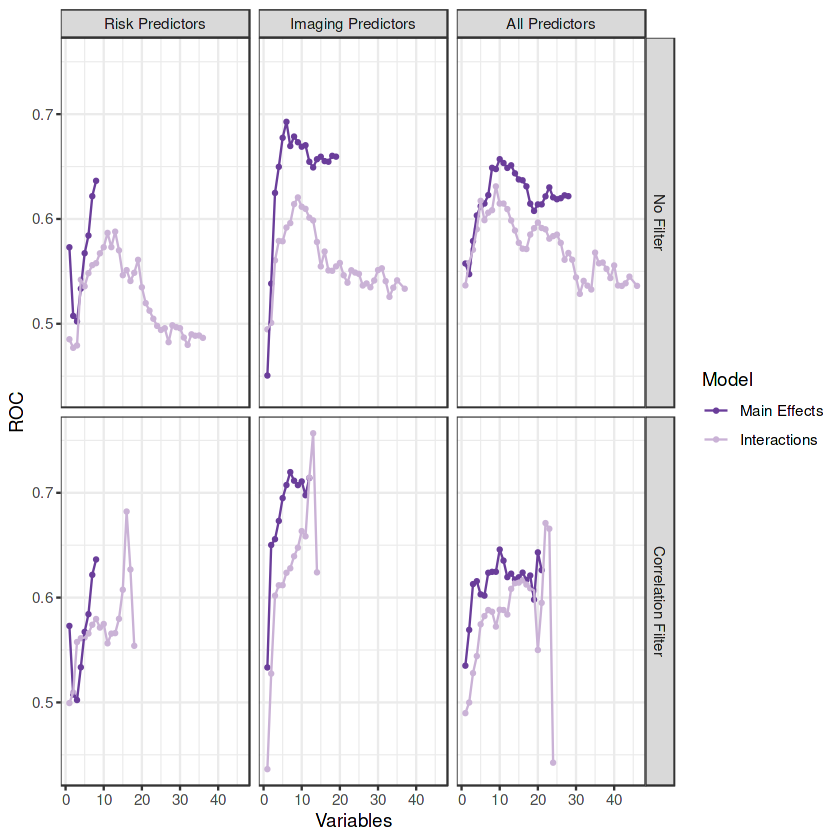

In [1]:
# Packages
packages <- c("caret", "tidymodels", "utils", "pROC", "plotly","doMC")

# Install packages not yet installed
installed_packages <- packages %in% rownames(installed.packages())
if (any(installed_packages == FALSE)) {
  install.packages(packages[!installed_packages])
}

# Packages loading
invisible(lapply(packages, library, character.only = TRUE))

theme_set(theme_bw())


# ------------------------------------------------------------------------------

load("stroke_data.RData")
load("interactions.RData")

VC_preds <- 
  c("CALCVol", "CALCVolProp", "MATXVol", "MATXVolProp", "LRNCVol", 
    "LRNCVolProp", "MaxCALCArea", "MaxCALCAreaProp", "MaxDilationByArea", 
    "MaxMATXArea", "MaxMATXAreaProp", "MaxLRNCArea", "MaxLRNCAreaProp", 
    "MaxMaxWallThickness", "MaxRemodelingRatio", "MaxStenosisByArea", 
    "MaxWallArea", "WallVol", "MaxStenosisByDiameter")

risk_preds <-
  c("age", "sex", "SmokingHistory", "AtrialFibrillation", "CoronaryArteryDisease", 
    "DiabetesHistory", "HypercholesterolemiaHistory", "HypertensionHistory")

risk_train <- 
  stroke_train %>%
  dplyr::select(one_of(risk_preds), Stroke)

image_train <- 
  stroke_train %>%
  dplyr::select(one_of(VC_preds), Stroke)

# ------------------------------------------------------------------------------

fiveStats <- function(...) c(twoClassSummary(...), defaultSummary(...))
internal_ctrl = trainControl(method = "none", classProbs = TRUE,
                             allowParallel = FALSE)
lrFuncsNew <- caretFuncs  
lrFuncsNew$summary <- fiveStats
rfeCtrl <- rfeControl(functions = lrFuncsNew,
                      method = "repeatedcv",
                      repeats = 5,
                      rerank = FALSE,
                      returnResamp = "all",
                      saveDetails = TRUE,
                      verbose = FALSE)

# ------------------------------------------------------------------------------
# Here I'll run in parallel using doMC. For Windows, a different package can
# be used.
registerDoMC(cores = parallel::detectCores(logical = FALSE) - 1)

# ------------------------------------------------------------------------------
# RFE procedure using risk predictors

# All pair-wise interactions
risk_int_filtered_recipe <-
  recipe(Stroke ~ ., data = risk_train) %>%
  step_interact(~ all_predictors():all_predictors()) %>%
  step_corr(all_predictors(), threshold = 0.75) %>% 
  step_center(all_predictors()) %>%
  step_scale(all_predictors()) %>%
  step_zv(all_predictors())

set.seed(63331)
risk_int_filtered_rfe <- rfe(
  risk_int_filtered_recipe,
  data = risk_train,
  sizes = 1:36,
  rfeControl = rfeCtrl,
  metric = "ROC",
  ## train options
  method = "glm",
  trControl = internal_ctrl
)

# Main effects
risk_main_filtered_recipe <-
  recipe(Stroke ~ ., data = risk_train) %>%
  step_corr(all_predictors(), threshold = 0.75) %>% 
  step_center(all_predictors()) %>%
  step_scale(all_predictors()) %>%
  step_zv(all_predictors())

set.seed(63331)
risk_main_filtered_rfe <- rfe(
  risk_main_filtered_recipe,
  data = risk_train,
  sizes = 1:8,
  rfeControl = rfeCtrl,
  metric = "ROC",
  ## train options
  method = "glm",
  trControl = internal_ctrl
)

# ------------------------------------------------------------------------------
# RFE procedure using imaging predictors

img_int_filtered_recipe <-
  recipe(Stroke ~ ., data = image_train) %>%
  step_interact(int_form)  %>%
  step_corr(all_predictors(), threshold = 0.75) %>%
  step_center(all_predictors()) %>%
  step_scale(all_predictors()) %>%
  step_YeoJohnson(all_predictors()) %>%
  step_zv(all_predictors())

set.seed(63331)
img_int_filtered_rfe <- rfe(
  img_int_filtered_recipe,
  data = image_train,
  sizes = 1:35,
  rfeControl = rfeCtrl,
  metric = "ROC",
  ## train options
  method = "glm",
  trControl = internal_ctrl
)

img_main_filtered_recipe <-
  recipe(Stroke ~ ., data = image_train)  %>%
  step_corr(all_predictors(), threshold = 0.75) %>%
  step_center(all_predictors()) %>%
  step_scale(all_predictors()) %>%
  step_YeoJohnson(all_predictors()) %>%
  step_zv(all_predictors())

set.seed(63331)
img_main_filtered_rfe <- rfe(
  img_main_filtered_recipe,
  data = image_train,
  sizes = 1:19,
  rfeControl = rfeCtrl,
  metric = "ROC",
  ## train options
  method = "glm",
  trControl = internal_ctrl
)

# ------------------------------------------------------------------------------

both_int_filtered_recipe <-
  recipe(Stroke ~ ., data = stroke_train) %>%
  step_interact(int_form)  %>%
  step_corr(all_predictors(), threshold = 0.75) %>%
  step_center(all_predictors()) %>%
  step_scale(all_predictors()) %>%
  step_YeoJohnson(all_predictors()) %>%
  step_zv(all_predictors())

set.seed(63331)
both_int_filtered_rfe <- rfe(
  both_int_filtered_recipe,
  data = stroke_train,
  sizes = 1:44,
  rfeControl = rfeCtrl,
  metric = "ROC",
  ## train options
  method = "glm",
  trControl = internal_ctrl
)

both_main_filtered_recipe <-
  recipe(Stroke ~ ., data = stroke_train)  %>%
  step_corr(all_predictors(), threshold = 0.75) %>%
  step_center(all_predictors()) %>%
  step_scale(all_predictors()) %>%
  step_YeoJohnson(all_predictors()) %>%
  step_zv(all_predictors())

set.seed(63331)
both_main_filtered_rfe <- rfe(
  both_main_filtered_recipe,
  data = stroke_train,
  sizes = 1:28,
  rfeControl = rfeCtrl,
  metric = "ROC",
  ## train options
  method = "glm",
  trControl = internal_ctrl
)

# ------------------------------------------------------------------------------

risk_int_recipe <-
  recipe(Stroke ~ ., data = risk_train) %>%
  step_interact(~ all_predictors():all_predictors()) %>%
  step_center(all_predictors()) %>%
  step_scale(all_predictors()) %>%
  step_zv(all_predictors())

set.seed(63331)
risk_int_rfe <- rfe(
  risk_int_recipe,
  data = risk_train,
  sizes = 1:36,
  rfeControl = rfeCtrl,
  metric = "ROC",
  ## train options
  method = "glm",
  trControl = internal_ctrl
)

risk_main_recipe <-
  recipe(Stroke ~ ., data = risk_train) %>%
  step_center(all_predictors()) %>%
  step_scale(all_predictors()) %>%
  step_zv(all_predictors())

set.seed(63331)
risk_main_rfe <- rfe(
  risk_main_recipe,
  data = risk_train,
  sizes = 1:8,
  rfeControl = rfeCtrl,
  metric = "ROC",
  ## train options
  method = "glm",
  trControl = internal_ctrl
)

# ------------------------------------------------------------------------------

img_int_recipe <-
  recipe(Stroke ~ ., data = image_train) %>%
  step_interact(int_form)  %>%
  step_center(all_predictors()) %>%
  step_scale(all_predictors()) %>%
  step_YeoJohnson(all_predictors()) %>%
  step_zv(all_predictors())

set.seed(63331)
img_int_rfe <- rfe(
  img_int_recipe,
  data = image_train,
  sizes = 1:35,
  rfeControl = rfeCtrl,
  metric = "ROC",
  ## train options
  method = "glm",
  trControl = internal_ctrl
)

img_main_recipe <-
  recipe(Stroke ~ ., data = image_train)  %>%
  step_center(all_predictors()) %>%
  step_scale(all_predictors()) %>%
  step_YeoJohnson(all_predictors()) %>%
  step_zv(all_predictors())

set.seed(63331)
img_main_rfe <- rfe(
  img_main_recipe,
  data = image_train,
  sizes = 1:19,
  rfeControl = rfeCtrl,
  metric = "ROC",
  ## train options
  method = "glm",
  trControl = internal_ctrl
)

# ------------------------------------------------------------------------------

both_int_recipe <-
  recipe(Stroke ~ ., data = stroke_train) %>%
  step_interact(int_form)  %>%
  step_center(all_predictors()) %>%
  step_scale(all_predictors()) %>%
  step_YeoJohnson(all_predictors()) %>%
  step_zv(all_predictors())

set.seed(63331)
both_int_rfe <- rfe(
  both_int_recipe,
  data = stroke_train,
  sizes = 1:44,
  rfeControl = rfeCtrl,
  metric = "ROC",
  ## train options
  method = "glm",
  trControl = internal_ctrl
)

both_main_recipe <-
  recipe(Stroke ~ ., data = stroke_train)  %>%
  step_center(all_predictors()) %>%
  step_scale(all_predictors()) %>%
  step_YeoJohnson(all_predictors()) %>%
  step_zv(all_predictors())

set.seed(63331)
both_main_rfe <- rfe(
  both_main_recipe,
  data = stroke_train,
  sizes = 1:28,
  rfeControl = rfeCtrl,
  metric = "ROC",
  ## train options
  method = "glm",
  trControl = internal_ctrl
)

# ------------------------------------------------------------------------------

format_data <- function(x, lab, int = FALSE) {
  dat <- 
    x %>% 
    pluck("results") %>% 
    mutate(Predictors = !!lab) %>% 
    dplyr::select(ROC, Variables, Predictors, Variables, Num_Resamples) %>% 
    mutate(Model = "Main Effects")
  if (int)
    dat$Model <- "Interactions"
  dat
  
}

filtered_dat <- 
  format_data(risk_main_filtered_rfe, lab = "Risk Predictors") %>% 
  bind_rows(
    format_data(risk_int_filtered_rfe, lab = "Risk Predictors", TRUE),
    format_data(img_main_filtered_rfe, lab = "Imaging Predictors"),
    format_data(img_int_filtered_rfe, lab = "Imaging Predictors", TRUE),
    format_data(both_main_filtered_rfe, lab = "All Predictors"),
    format_data(both_int_filtered_rfe, lab = "All Predictors", TRUE)
  ) %>% 
  mutate(
    Predictors = factor(
      Predictors, 
      levels = c("Risk Predictors", "Imaging Predictors", "All Predictors")
    ),
    Model = factor(Model, levels = c("Main Effects", "Interactions")),
    Filtering = "Correlation Filter"
  )

unfiltered_dat <- 
  format_data(risk_main_rfe, lab = "Risk Predictors") %>% 
  bind_rows(
    format_data(risk_int_rfe, lab = "Risk Predictors", TRUE),
    format_data(img_main_rfe, lab = "Imaging Predictors"),
    format_data(img_int_rfe, lab = "Imaging Predictors", TRUE),
    format_data(both_main_rfe, lab = "All Predictors"),
    format_data(both_int_rfe, lab = "All Predictors", TRUE)
  ) %>% 
  mutate(
    Predictors = factor(
      Predictors, 
      levels = c("Risk Predictors", "Imaging Predictors", "All Predictors")
    ),
    Model = factor(Model, levels = c("Main Effects", "Interactions")),
    Filtering = "No Filter"
  )

rfe_data <- 
  bind_rows(filtered_dat, unfiltered_dat) %>% 
  mutate(
    Filtering = factor(Filtering, levels = c("No Filter", "Correlation Filter"))
  )

# ------------------------------------------------------------------------------

# https://bookdown.org/max/FES/predictive-modeling-across-sets.html#fig:stroke-rfe-res
ggplot(rfe_data, aes(x = Variables, y = ROC, col = Model)) +
  geom_point(size = 0.75) + 
  geom_line() + 
  facet_grid(Filtering ~ Predictors) + 
  scale_color_manual(values = c("#6A3D9A", "#CAB2D6"))

# ------------------------------------------------------------------------------

# https://bookdown.org/max/FES/predictive-modeling-across-sets.html#tab:stroke-rfe-tab
rfe_tab <-
  img_main_filtered_rfe %>% 
  pluck("variables") %>% 
  filter(Variables == img_main_filtered_rfe$optsize) %>% 
  group_by(var) %>% 
  count() %>% 
  arrange(desc(n)) %>% 
  mutate(final = ifelse(var %in% img_main_filtered_rfe$optVariables, "Yes", "No")) %>% 
  ungroup()

# ------------------------------------------------------------------------------

save(both_int_filtered_rfe, both_int_rfe, both_main_filtered_rfe, both_main_rfe, 
     img_int_filtered_rfe, img_int_rfe, img_main_filtered_rfe, img_main_rfe, 
     risk_int_filtered_rfe, risk_int_rfe, risk_main_filtered_rfe, risk_main_rfe, 
     file = "stroke_rfe.RData")

# ------------------------------------------------------------------------------

